<a href="https://colab.research.google.com/github/lucasarneiro5/Data-Science/blob/main/DS_Otimiza%C3%A7%C3%A3o_do_Planejamento_da_Manuten%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio DS**

* Autor: Lucas Arneiro Vieira

* Data: 16/05



---



---



*Situação simulada - A área de Dados foi chamada pelo time de Operações para resolver e melhorar o planejamento da manutenção de uma frota de caminhões.* 

A empresa conta uma frota média de caminhões para realizar entregas por todo país. Porém, nos últimos 3 anos, ela vem percebendo um grande aumento nos gastos referentes à manutenção do sistema de ar de seus veículos - mesmo mantendo o tamanho de sua frota constante. O custo com manutenção deste sistema específico é mostrado abaixo (em dólar): 

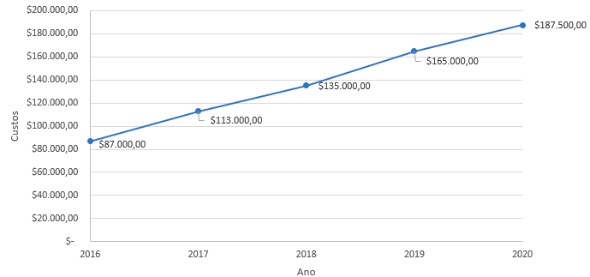


O objetivo do Cientista de Dados é diminuir os custos de manutenção do sistema de ar nos caminhões. 

Durante a reunião de alinhamento com os responsáveis do projeto e a equipe de Operações da empresa, algumas informações lhe foram passadas: 




* Os custos de manutenção para o sistema de ar podem variar de acordo com o real estado do caminhão. 
* Se um caminhão for mandado para manutenção e não apresentar nenhum defeito neste sistema, será cobrado em torno de 10 dólares pelo tempo gasto no serviço de vistoria especializada. Todavia, se um caminhão com defeitos no sistema de ar não for enviado diretamente para manutenção, a empresa desembolsará $500 para realizar a manutenção corretiva do mesmo, considerando a mão de obra e a troca de peças. 
* A equipe técnica lhe informou que todas as informações referentes ao sistema de ar dos caminhões serão disponibilizadas para você. Contudo, por motivos burocráticos, todas as colunas precisavam ser codificadas.
* A equipe técnica também lhe informou que, dada a recente digitalização da empresa, algumas informações podem estar ausentes da base de dados que lhe foi enviada. 
* Você foi informado que a fonte de informações advém do setor de Manutenção da empresa, no qual eles criaram uma coluna na base de dados chamada class. Nela, “pos” seriam aqueles caminhões que apresentavam defeitos no sistema de ar e “neg” seriam aqueles caminhões que apresentavam defeito em qualquer outro sistema que não fosse o de ar. 

Os responsáveis pelo projeto estão bem animados com a iniciativa. Ao pedir uma prova técnica colocou como requisitos principais: 
* Conseguimos diminuir nossos gastos com este tipo de manutenção utilizando técnicas de AI? 
* Você consegue me apresentar os principais fatores que alertam uma possível falha neste sistema? 
Estes pontos, segundo eles, são importantes para convencer a Diretoria Executiva a abraçar a causa e aplicá-la para outros sistemas de manutenção durante o ano de 2021. 





---


---

# **Contexto**

Com o surgimento da chamada 4ª Rev. Industrial, tivemos um grande avanço tecnológico e duas tecnologias emergentes se fundiram, para possibilitar a automação de todo o processo de coleta, lançamento, análise e deliberação de dados, da seguinte maneira: 
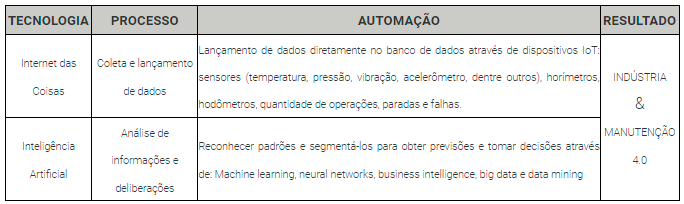

A evolução e automação dos processos representa um salto de qualidade e desempenho nas manutenções em geral, garantindo as empresas atuarem de forma proativa e preventiva, evitando a ação somente quando a falha já ocorreu.

*Fonte*: [Entenda como a inteligência artificial pode e deve ser aplicada na manutenção industrial](https://www.revistamanutencao.com.br/literatura/tecnica/correlata/entenda-como-a-inteligencia-artificial-pode-e-deve-ser-aplicada-na-manutencao-industrial.html)




---




## **Passo 1:** Verificar a versão do python e bibliotecas e importar as que serão usadas, de forma a não haver conflitos de versões em projeto, no futuro:

In [252]:
# Python Version
!python --version

Python 3.7.13


In [253]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [254]:
# Pandas Version
pd.__version__

'1.3.5'

In [255]:
# Numpy Version
np.__version__

'1.21.6'

In [256]:
# Matplotlib Version
pyplot.__version__

'3.2.2'

In [257]:
# Seaborn Version
sns.__version__

'0.11.2'

In [258]:
# If we want to check all libraries version:
#!pip freeze



---



## **Passo 2:** Vamos importa as base de dados pré-2020 e realizar algumas análises

In [259]:
# Import previously dataset from 2020 
df_pre = pd.read_csv('data_pre_2020.csv')

# Checking first 5 elements from dataset
df_pre.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


**2.1) Quantidade de dados:**

In [260]:
# Data Volumn:
df_pre.shape

(60000, 171)

**Em relação aos dados:**

* 60.000 dados de entrada (linhas)
* 171 informações do sistema de ar (colunas)




**2.2) Tipos de variáveis:**



In [261]:
df_pre.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

**2.2.1) Vamos transformar as colunas em numerico para facilitar o tratamento de dados**

In [262]:
# Transforming all columns, except the 'class' one, in numeric values
cols = df_pre.columns
df_pre[cols[1:]] = df_pre[cols[1:]].apply(pd.to_numeric, errors='coerce')

In [263]:
# Transforming to check some null ou 'na' values
df_pre.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

**2.3) Qual a porcentagem de valores ausentes?**

In [264]:
# sort in descending order null values in %
(df_pre.isnull().sum()/df_pre.shape[0]).sort_values(ascending=False)*100

br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
            ...    
cj_000     0.563333
ci_000     0.563333
bt_000     0.278333
aa_000     0.000000
class      0.000000
Length: 171, dtype: float64

In [265]:
# Lets create a function to check if the dataset has any null value
def detect_null_value(dataset):
  print('\nAny null value? ')
  if dataset[columns].isnull().values.any() == False:
    print('No!')
  else:
    print('Yes!')


In [266]:
# Or Any missing values?
# Any missing values yet?
detect_null_value(df_pre)


Any null value? 
Yes!


Verificamos alguns valores nulos neste dataset, vamos trata-los.



Alguns pontos são importantes de ressaltar:

* Como as colunas estão codificadas, não iremos conseguir julga-las de acordo com a sua utilidade ou não, por isso, não poderão ser excluidas;

* Existem técnicas avançadas que são combinadas com o preenchimento de valores, como por exemplo analisar correlações ou mesmo construir um modelo preditivo para missing values;

* Não sabemos bem as características de cada coluna, por isso podemos preencher null values com os valores de media (*mean_value*) da respectiva coluna, por exemplo. Se optarmos pela moda, teremos os valores substituidos por zero em muitos casos, vejamos: 



In [267]:
# Using loop for to run all dataset, except first column, take the freq_value and fill those 'na' values
freq_value = pd.DataFrame()
for columns in df_pre[df_pre.columns[1:]]:
  freq_value = df_pre[columns].value_counts().idxmax()
  time.sleep(1)
  #print(freq_value)
  df_pre[columns].fillna(freq_value, inplace=True)


# Any missing values yet?
detect_null_value(df_pre)


Any null value? 
No!


**2.4) Qual a quatidade de cada tipo de defeito?**

In [268]:
# print number of elements from column 'class'
df_pre['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

**Temos:**

* 59 mil defeitos que não foram relacionados ao sistema de ar, antes de 2020;
* E 1000 defeitos relacionados ao sistema de ar, antes de 2020.



---



## **Passo 3:** Vamos importa as base de dados pós-2020 e realizar algumas análises

In [269]:
# Reading dataset
df = pd.read_csv('data_2020.csv')

# Showing first 5 elements
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


**3.1) Quantidade de dados:**

In [270]:
# Data Volumn:
df.shape

(16000, 171)

**3.1) Em relação aos dados:**

* 16000 dados de entrada (linhas)
* 171 informações do sistema de ar (colunas)

* **Nesta situação, temos as mesmas informações referentes ao sistema de ar dos caminhões (171), contudo, menos dados de entrada, o que pode influenciar na média total de custos com manutenção, ou seja, podemos ter uma falsa queda de gastos com manutenção após 2020.**



**3.2) Tipos de variáveis:**



In [271]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

**3.2.1) Vamos transformar as colunas em numerico para facilitar o tratamento de dados**

In [272]:
# Transforming all columns, except the 'class' one, in numeric values
cols = df_pre.columns
df[cols[1:]] = df[cols[1:]].apply(pd.to_numeric, errors='coerce')

In [273]:
# Transforming to check some null or 'na' values
df.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

**3.3) Qual a porcentagem de valores ausentes?**

In [274]:
# sort in descending order null values in %
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

br_000    82.05625
bq_000    81.13125
bp_000    79.50625
bo_000    77.35000
ab_000    77.26875
            ...   
cj_000     0.53750
ci_000     0.53750
bt_000     0.17500
aa_000     0.00000
class      0.00000
Length: 171, dtype: float64

In [275]:
# Any missing values?
detect_null_value(df)


Any null value? 
Yes!


Verificamos alguns valores nulos neste dataset, vamos trata-los como anteriormente:

In [276]:
# Using loop for to run all dataset, except first column, take the freq_value and fill those 'na' values
for columns in df[cols[1:]]:
  freq_value = df[columns].value_counts().idxmax()
  time.sleep(1)
  #print(freq_value)
  df[columns].fillna(freq_value, inplace=True)


# Any missing values yet?
detect_null_value(df)


Any null value? 
No!


**2.4) Qual a quatidade de cada tipo de defeito?**

In [277]:
# print number of elements from column 'class'
df['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

**Temos:**

* 15625 mil defeitos que não foram relacionados ao ar, após 2020;
* E 375 defeitos relacionados a ar, após de 2020.

---



## **Passo 4:** Tendo valores de defeitos antes e após 2020, podemos comparar e tirar insights


In [304]:
# Saving manutence value from previously and after 2020
neg_pre = df_pre['class'].value_counts()[0]
pos_pre = df_pre['class'].value_counts()[1]
neg_pos = df['class'].value_counts()[0]
pos_pos = df['class'].value_counts()[1]



print('Nª Outros defeitos, pré-2020: ', neg_pre)
print('Nª Defeito sistema de ar, pré-2020: ', pos_pre)
print('Nª Outros defeitos, pós-2020: ', neg_pos)
print('Nª Defeito sistema de ar, pós-2020: ', pos_pos)

Nª Outros defeitos, pré-2020:  59000
Nª Defeito sistema de ar, pré-2020:  1000
Nª Outros defeitos, pós-2020:  15625
Nª Defeito sistema de ar, pós-2020:  375


**4.1) Proporcionalmente temos:**

In [307]:
print('Porcentagem de {:.2f}% de manutenção no sitema de ar, antes de 2020.'.format((pos_pre/(pos_pre+neg_pre))*100))

Proporcionalmente temos 1.67% de manutenção no sitema de ar, antes de 2020.


In [308]:
print('Porcentagem de {:.2f}% de manutenção no sitema de ar, após de 2020.'.format((pos_pos/(pos_pos+neg_pos))*100))

Porcentagem de 2.34% de manutenção no sitema de ar, após de 2020.


***OBS:***

* Vemos uma discrepância de quantidade de dados entre os dados pré-2020 e pós-2020. Para criação de modelos é recomendado o equilibrio das classes.


Caso opte, podemos utilizar o método do **downsampling** ou **undersample**, segue um exemplo:

In [298]:
# Temos que alcançar 15625 dados de outros defeitos dos 59000  do dataset 
neg_pre = df_pre['class'][0:15924].value_counts()[0]
print('Nª Outros defeitos, pré-2020 após downsampling:', neg_pre)

# Alcançar 375 dados dos defeitos de ar dos 1000  do dataset
pos_pre = df_pre['class'][0:385].value_counts()[0]
print('Nª Defeito sistema de ar, pré-2020: ', pos_pre)

Nª Outros defeitos, pré-2020 após downsampling: 15625
Nª Defeito sistema de ar, pré-2020:  375




---


## **Conclusão e Análises**

* Analisando somente os dados pré-2020, vemos que os defeitos eram muito menores no sistema de ar, do que outros defeitos no geral. Ou seja, a manutenção no geral ocorria por outros motivos;

* O aumento nos gastos com manutenção, pelo o que foi proposto na situação problema, não era tanto com a manutenção preventiva (os $10 pela vistoria especializada) e sim com os 500 dólares para realizar a manutenção corretiva no sistema de ar;

* Os custos da manutenção de ar podem variar de acordo com o real estado do caminhão, ou seja, um caminhão com problemas além do sistema de ar poderá ter um custo maior;

* Investimentos na vistoria especializada devem ser maiores, evitando futuros defeitos e até localizando o ínicio de alguns que poderiam se tornar graves;

* Utilizando técnica de IA, criando um modelo de Machine Learning, por exemplo, baseado em **árvore de decisão** ou uma **regressão logistica**, podemos ajudar a prever futuras falhas e indicar quando os caminhões deverão ser enviados para a vistoria, diminuindo nossos gastos; 

* A amostra de dados após em 2020 é muito menor comparada a anos anteriores. Proporcionalmente, vemos um aumento na manutenção do sistema de ar, levando em conta que ja vinha aumentando nos anos anteriores;

* Será necessário um entendimento das características do sistema de ar (codificados) para entender qual delas está ocasionando este aumento das manutenções, consequentemente dos gastos;

* A manutenção preventiva em caminhões requer atenção em várias variáveis, mas como pontos importantes sempre realizados, são: Filtros de oléo, combustível e ar do motor, Óleo do motor, Freio, Suspensão, Pneus, dentre outros.
FONTE: [10 pontos para ficar atento na manutenção preventiva do caminhão](https://chiptronic.com.br/blog/10-pontos-para-ficar-atento-na-manutencao-preventiva-do-caminhao)

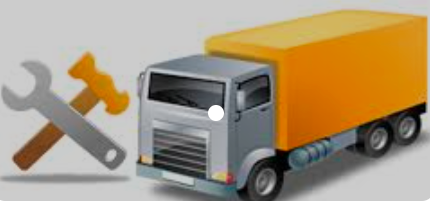